<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 2nd exercise: <font color="#C70039">Work with Boxplots for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: Mathis Lövenich
* Date:   31.10.2022
* Matr. No.: 11157363 

<img src="https://r-graph-gallery.com/img/other/boxplot_explanation.png" style="float: center;" width="800">
<img src="https://i2.wp.com/upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/550px-Boxplot_vs_PDF.svg.png?w=578" style="float: center;" width="800">


---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using boxplots to detect anomalies. Try to interpret the boxplot. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and create a boxplot for each of them
5. interpret the visual results and describe them
6. how can you test your data for being normally distributed? 
-----------------------------------------------------------------------------------

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import randn
np.random.seed(1)


In [7]:
# multiply and add by random numbers to get some real values
# randn generates samples from the normal distribution (important - see below)
random_data = np.random.randn(50000)  * 20 + 20

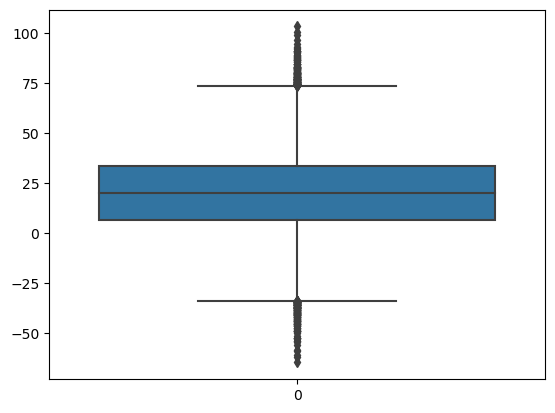

In [8]:
sns.boxplot(data=random_data)
plt.show()

In [9]:
heights_and_weights = (
    pd.read_csv("data/SOCR-HeightWeight.csv")
).rename(
    columns={
        'Height(Inches)': 'height', 
        'Weight(Pounds)': 'weight'
    }
)

In [10]:
penguins = sns.load_dataset("penguins")

<AxesSubplot:>

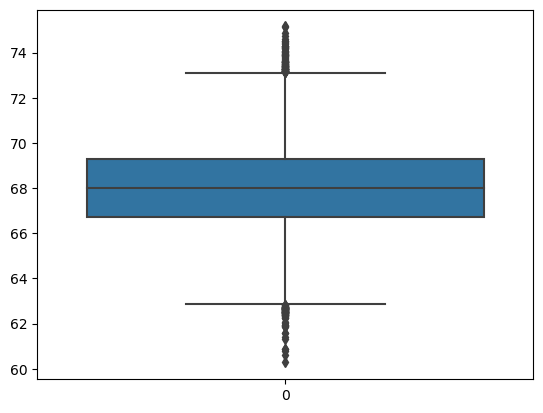

In [13]:
sns.boxplot(heights_and_weights.height)

<AxesSubplot:>

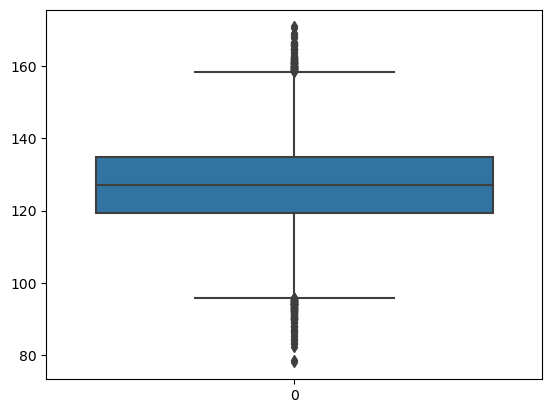

In [14]:
sns.boxplot(heights_and_weights.weight)

<AxesSubplot:>

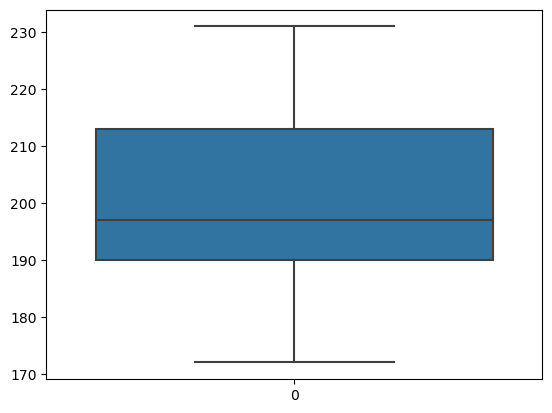

In [31]:
sns.boxplot(penguins.flipper_length_mm)

For human body height and weight we see a lot of outliers that are bellow or above 1.5 the IQR. This kind of anomaly detection is similar to what we have done with the normal distribution. However here we can't say that the 0.3 % holds cause a boxplot has a different mathematical definition.

We can't obeserve any outliers for the boxplot of penguins flipper length, similar to what we have observed with the anomaly detectedion from Ex1

To 5: there are different kind of test to show or indicate that a underlying distribution is a normal distribution.

One that I will present here is the Shapiro-Wilk-Test.

The null hypothesis of the Shapiro-Wilk test, whether it is a normal distribution, 
is accepted or rejected on the basis of the value of the following estimator. 

\begin{equation}
W={\frac  {b^{2}}{(n-1)s^{2}}}
\end{equation}

$n$ ist the sample size, $s^{2}$ is the empirical variance and $b$ is a correction of the variance,
measured like this:

\begin{equation}
b=a_{{(1)}}\left(x_{{(n)}}-x_{{(1)}}\right)+a_{{(2)}}\left(x_{{\left(n-1\right)}}-x_{{(2)}}\right)+\cdots 
\end{equation}

The constants $a_(i)$ can be found on a table, like: https://www.real-statistics.com/statistics-tables/shapiro-wilk-table/


The value of $W$ is then compared to a critical value that can also be found on a table whic can finally yield a conclusion if the distribution is normal or not

Here I will just use the existing function of scipy:

In [17]:
from scipy.stats import shapiro

In [22]:
shapiro(heights_and_weights.weight)

ShapiroResult(statistic=0.999895453453064, pvalue=0.37611162662506104)

We cannot say that we have no normal distribution here because pvalue > 0.05

In [26]:
shapiro(heights_and_weights.height)

ShapiroResult(statistic=0.9999220371246338, pvalue=0.6875156164169312)

We cannot say that we have no normal distribution here because pvalue > 0.05

In [32]:
shapiro(penguins.flipper_length_mm.dropna())

ShapiroResult(statistic=0.9515460133552551, pvalue=3.541138271501154e-09)

First we need to get rid of nan values, as this can't be handled by the test. \
As a result we get a pvalues much less than 0.05, which means we can strongly assume that this data is normally distributed